# Linear Regression From Scratch in Python (Mathematical)

- **Video:** https://youtu.be/VmbA0pi2cRQ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("datasets/study_scores.csv")
data

,hours,scores
0,3.153174,21
1,3.804660,47
2,1.662652,27
3,7.909352,75
4,4.853421,30
...,...,...
91,5.035901,60
92,4.334780,44
93,7.034478,63
94,4.386292,37


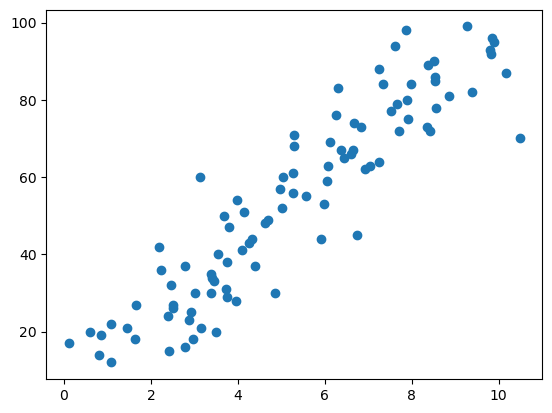

In [3]:
plt.scatter(data.hours, data.scores);

**Loss Function (MSE):**

$$ E= \frac{1}{n} \cdot \sum_{i=0}^{n}(y_i - (m \cdot x_i + b))^2 $$

In [4]:
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].hours
        y = points.iloc[i].scores
        total_error += (y - (m * x + b)) ** 2
    total_error / len(points)

**Gradient Descent:**

$$ \frac{\partial E}{\partial m} = -\frac{2}{n}\cdot\sum_{i=0}^{n}\cdot x_i\cdot(y_i - (m\cdot x_i + b)) $$

$$ \frac{\partial E}{\partial b} = -\frac{2}{n}\cdot\sum_{i=0}^{n}\cdot(y_i - (m\cdot x_i + b)) $$

In [5]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = len(points)

    for i in range(n):
        x = points.iloc[i].hours
        y = points.iloc[i].scores

        m_gradient += -2/n * x * (y - (m_now * x + b_now))
        b_gradient += -2/n * (y - (m_now * x + b_now))

    m = m_now - m_gradient * L
    b = b_now - m_gradient * L

    return m, b

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300
m=8.633116725779068, b=8.633116725779068


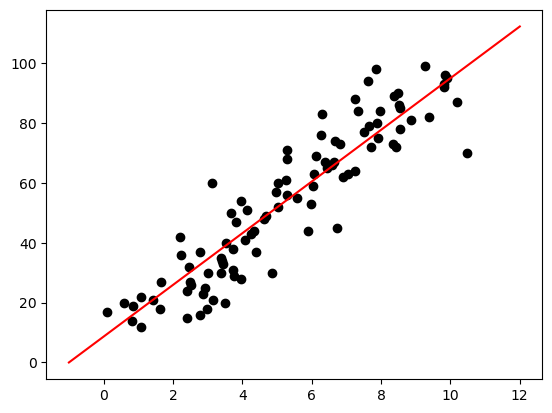

In [6]:
m = 0
b = 0
L = 0.0005
epochs = 350

for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
    m, b = gradient_descent(m, b, data, L)

print(f"{m=}, {b=}")

plt.scatter(data.hours, data.scores, color="black")
# Plot the final fit line
x = list(range(-1, 13))
y = [m * x + b for x in x]
plt.plot(x, y, color="red")
plt.show()

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300


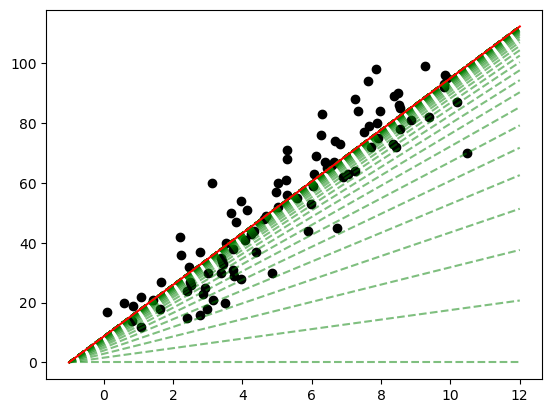

In [8]:
m = 0
b = 0
L = 0.0005
epochs = 350

# Initialize lists to store fit line parameters for plotting
m_history = [m]
b_history = [b]

for i in range(epochs):
  if i % 50 == 0:
    print(f"Epoch: {i}")
  m, b = gradient_descent(m, b, data, L)

  # Store fit line parameters for plotting every steps
  m_history.append(m)
  b_history.append(b)

plt.scatter(data.hours, data.scores, color="black")
# Plot the fit line for every epoch
for i in range(0, len(m_history), 5):
  x = list(range(-1, 13))
  y = [m_history[i] * x_i + b_history[i] for x_i in x]
  plt.plot(x, y, "g--", alpha=0.5)

# Plot the final fit line
# x = list(range(-1, 13))
y = [m * x + b for x in x]
plt.plot(x, y, color="red")
plt.show()